In [1]:
import pandas as pd
import mysql.connector
import os
import pymysql

# Single CSV file and its corresponding table name
csv_file = 'Laptop_sales_data.csv'
table_name = 'sales_data'

conn = pymysql.connect(
    host = "localhost",
    user = "root",
    password = "admin123",
    database = "laptop_sales_data"
)

cursor = conn.cursor()

# Folder containing the CSV file
folder_path = 'C:/Users/Dell/Desktop/'
file_path = os.path.join(folder_path, csv_file)

# Function to map pandas data types to SQL types
def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

# Process the single CSV file
if os.path.exists(file_path):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()
    print(f"Successfully processed: {csv_file}")
else:
    print(f"File not found: {file_path}")

# Close the connection
conn.close()

Processing Laptop_sales_data.csv
NaN values before replacement:
Customer_ID            0
Age                    0
Gender                 0
City                   0
Income_Level           0
Purchase_Mode          0
Brand_Purchased        0
 Price_Range           0
Payment_Mode           0
Purchase_Frequency     0
Satisfaction_Rating    0
dtype: int64

Successfully processed: Laptop_sales_data.csv


In [2]:
# CONNECTION WITH MYSQL WORKBENCH WITH JUPYTER
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

conn = pymysql.connect(
    host = "localhost",
    user = "root",
    password = "admin123",
    database = "laptop_sales_data"
)

cur = conn.cursor()

In [3]:
query = """ SELECT Age FROM sales_data"""
cur.execute(query)
data = cur.fetchall()

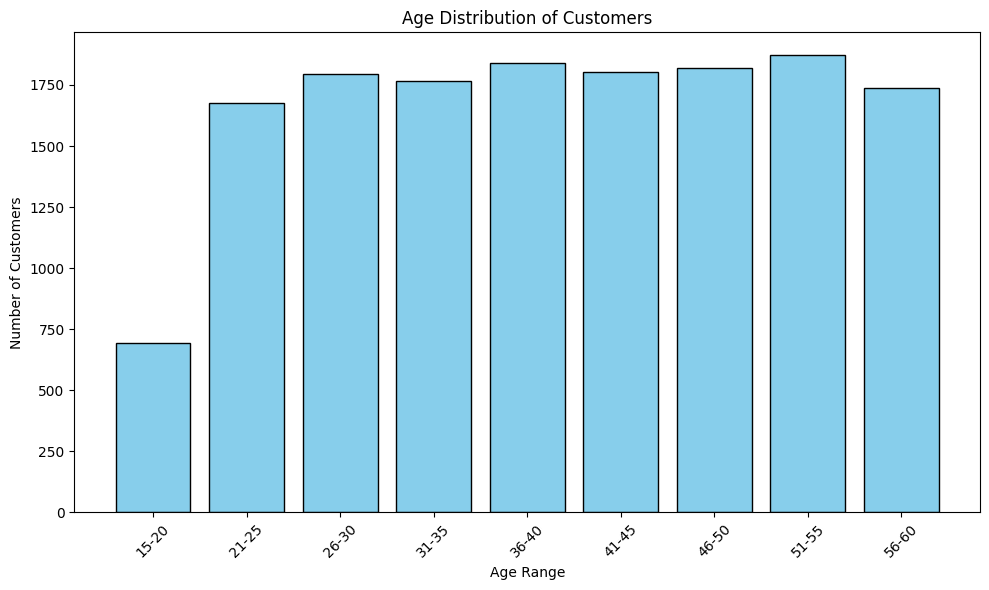

In [4]:
import numpy as np

# Flatten the list of tuples into a list of ages
ages = [item[0] for item in data]

# Define age ranges and labels
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]  # Adjust the bins for 5-unit intervals
labels = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60']

# Group ages into bins
age_groups = np.digitize(ages, bins)

# Count the number of customers in each group
group_counts = [sum(age_groups == i) for i in range(1, len(bins))]

# Plotting the Vertical Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(labels, group_counts, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age Range')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to avoid label clipping
plt.show()

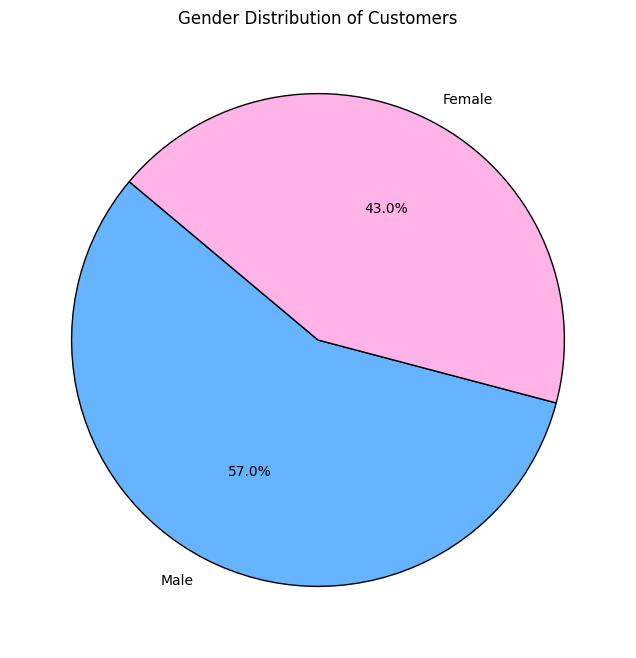

In [5]:
# Query to get the gender data from the sales_data table
query = """ SELECT Gender FROM sales_data"""
cur.execute(query)
data = cur.fetchall()

# Extract gender values
genders = [item[0] for item in data]

# Count the occurrences of each gender
gender_counts = pd.Series(genders).value_counts()

# Plotting the Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ffb3e6'], startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Gender Distribution of Customers')
plt.show()

# Close the connection
conn.close()

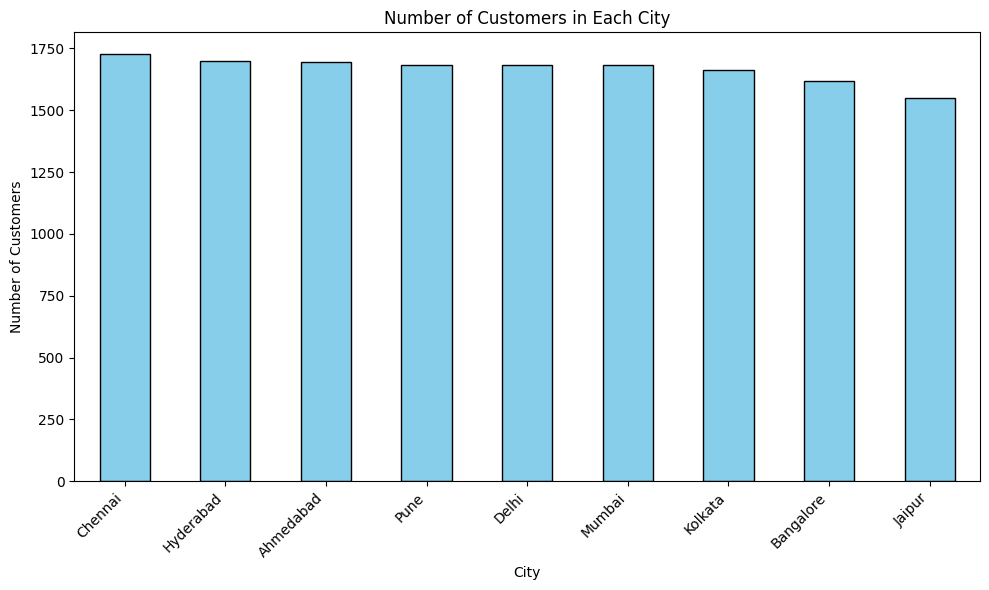

In [18]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt

# Connect to the MySQL database
conn = pymysql.connect(
    host="localhost",
    user="root",
    password="admin123",
    database="laptop_sales_data"
)

cur = conn.cursor()

# Query to get the city data from the sales_data table
query = """ SELECT City FROM sales_data"""
cur.execute(query)
data = cur.fetchall()

# Extract city names
cities = [item[0] for item in data]

# Count the occurrences of each city
city_counts = pd.Series(cities).value_counts()

# Plotting the Bar Chart
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Number of Customers in Each City')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to avoid label clipping

# Show the plot
plt.show()

# Close the connection
conn.close()

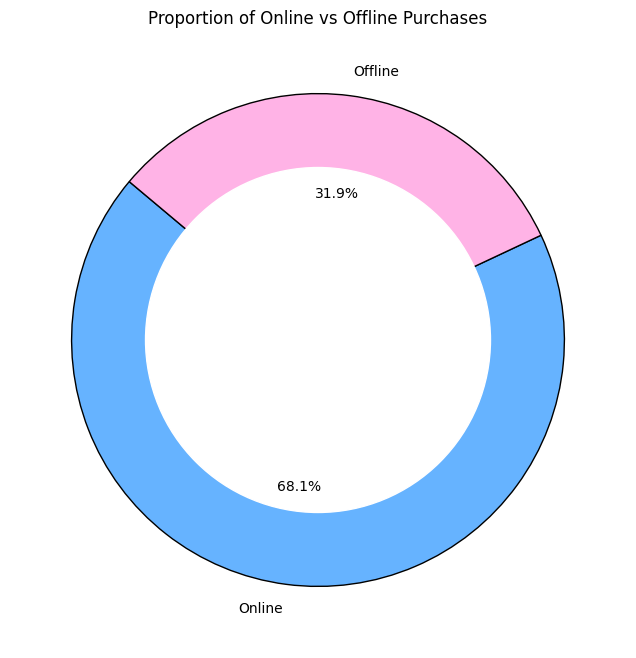

In [15]:
import pymysql

# Try to reconnect to MySQL and execute the query again
try:
    # Reconnect to the MySQL server
    conn = pymysql.connect(
        host="localhost",
        user="root",
        password="admin123",
        database="laptop_sales_data"
    )
    cur = conn.cursor()

    # Query to get the purchase mode data from the sales_data table
    query = """ SELECT Purchase_Mode FROM sales_data"""
    cur.execute(query)
    data = cur.fetchall()

    # Extract purchase modes (Online vs Offline)
    purchase_modes = [item[0] for item in data]

    # Count the occurrences of each purchase mode
    purchase_counts = pd.Series(purchase_modes).value_counts()

    # Plotting the Pie Chart
    plt.figure(figsize=(8, 8))
    plt.pie(purchase_counts, labels=purchase_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ffb3e6'], startangle=140, wedgeprops={'edgecolor': 'black'})
    
    # If you want a donut chart instead of a pie chart:
    # Creating a donut chart (by making the center of the pie chart transparent)
    plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))  # Donut hole
    plt.title('Proportion of Online vs Offline Purchases')
    plt.show()

except pymysql.MySQLError as e:
    print(f"Error: {e}")
finally:
    # Ensure connection is closed properly
    if conn.open:
        conn.close()


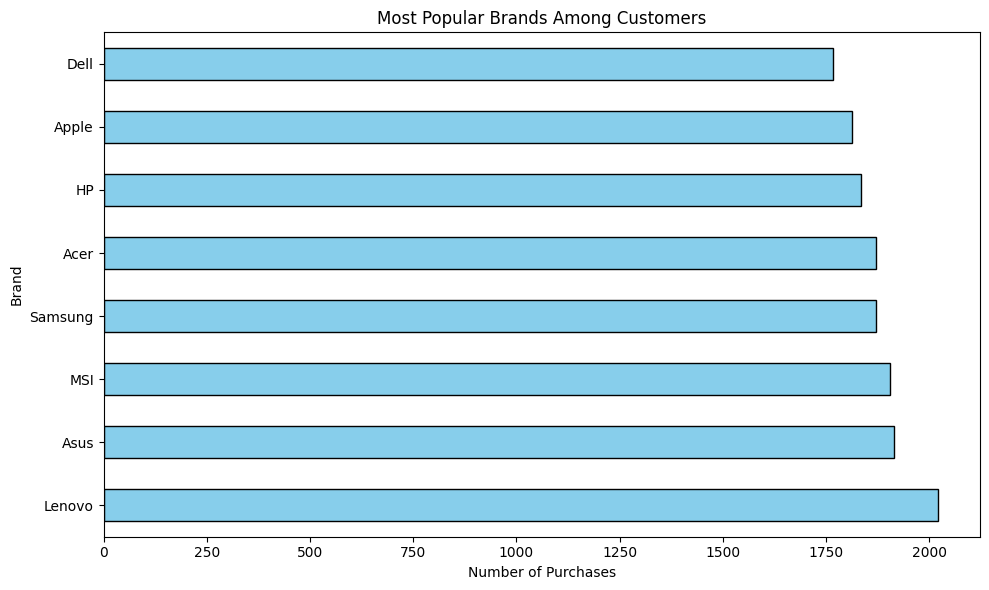

In [17]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt

# Connect to the MySQL database
conn = pymysql.connect(
    host="localhost",
    user="root",
    password="admin123",
    database="laptop_sales_data"
)
cur = conn.cursor()

# Query to get the brand purchased data from the sales_data table
query = """ SELECT Brand_Purchased FROM sales_data"""
cur.execute(query)
data = cur.fetchall()

# Extract brand names
brands = [item[0] for item in data]

# Count the occurrences of each brand
brand_counts = pd.Series(brands).value_counts()

# Plotting the Horizontal Bar Chart
plt.figure(figsize=(10, 6))
brand_counts.plot(kind='barh', color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Most Popular Brands Among Customers')
plt.xlabel('Number of Purchases')
plt.ylabel('Brand')
plt.tight_layout()  # Adjust layout to avoid label clipping

# Show the plot
plt.show()

# Close the connection
conn.close()

In [26]:
print(df.columns)

Index(['Customer_ID', 'Age', 'Gender', 'City', 'Income_Level', 'Purchase_Mode',
       'Brand_Purchased', '_Price_Range_', 'Payment_Mode',
       'Purchase_Frequency', 'Satisfaction_Rating'],
      dtype='object')


Payment_Mode
EMI            1089
Debit Card     1048
Credit Card     971
UPI             946
Cash            946
Name: count, dtype: int64


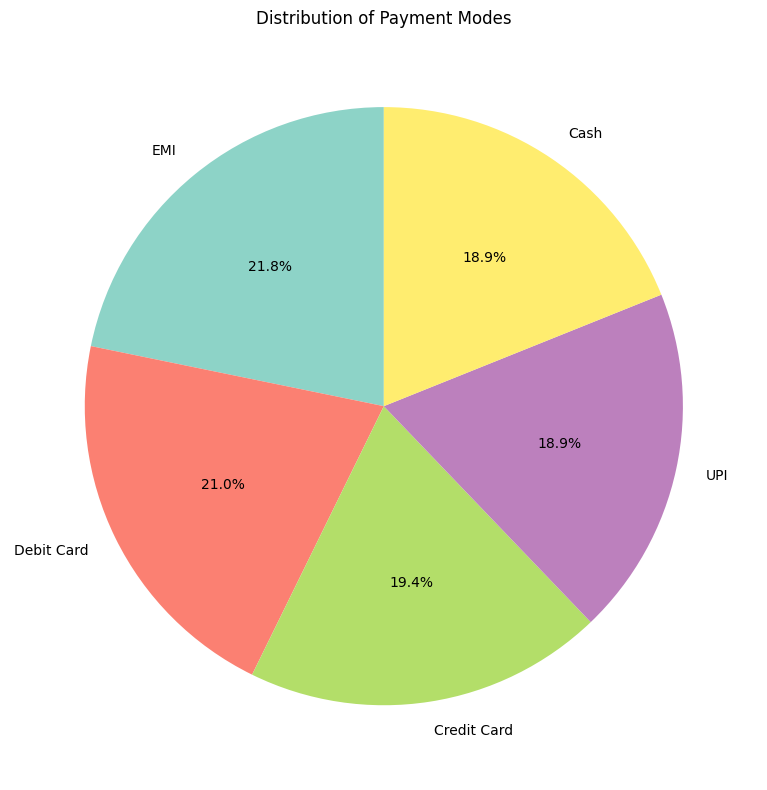

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your cleaned DataFrame
# Check for any leading/trailing spaces in column names (if any)
df.columns = df.columns.str.strip()

# Count the occurrences of each payment mode
payment_mode_counts = df['Payment_Mode'].value_counts()

# Display the counts to verify the data
print(payment_mode_counts)

# Visualization: Pie Chart
plt.figure(figsize=(8, 8))
payment_mode_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3', legend=False)
plt.title('Distribution of Payment Modes')
plt.ylabel('')  # Hide y-axis label for clarity
plt.tight_layout()
plt.show()



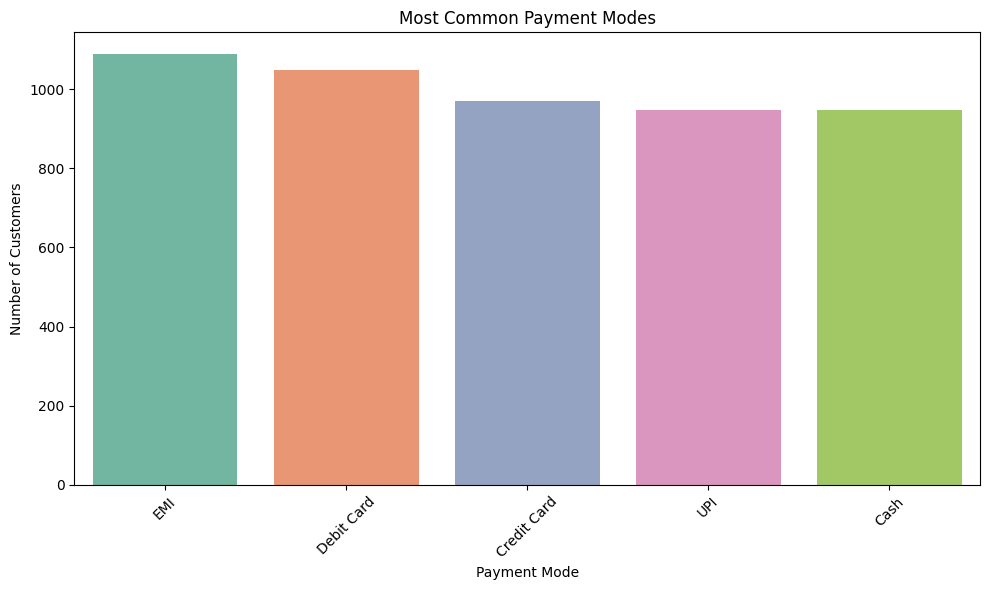

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the payment_mode_counts series
payment_mode_counts_df = payment_mode_counts.reset_index()
payment_mode_counts_df.columns = ['Payment_Mode', 'Count']

# Bar Chart: Using `hue` to avoid the deprecation warning
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_mode_counts_df, x='Payment_Mode', y='Count', hue='Payment_Mode', palette='Set2', dodge=False)
plt.title('Most Common Payment Modes')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

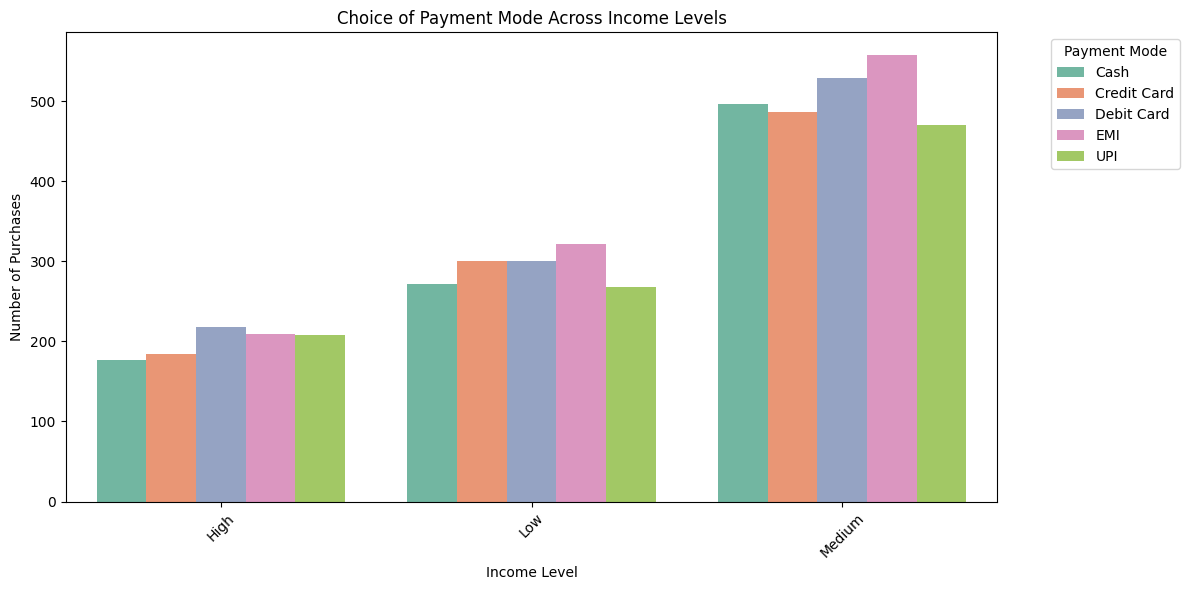

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is the cleaned DataFrame with 'Income_Level' and 'Payment_Mode' columns

# Group the data by 'Income_Level' and 'Payment_Mode' and count the occurrences
payment_mode_income_counts = df.groupby(['Income_Level', 'Payment_Mode']).size().reset_index(name='Count')

# Set the plot size
plt.figure(figsize=(12, 6))

# Create a clustered bar chart with 'Income_Level' on x-axis and counts of payment modes
sns.barplot(data=payment_mode_income_counts, x='Income_Level', y='Count', hue='Payment_Mode', palette='Set2')

# Customize the plot
plt.title('Choice of Payment Mode Across Income Levels')
plt.xlabel('Income Level')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend(title='Payment Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

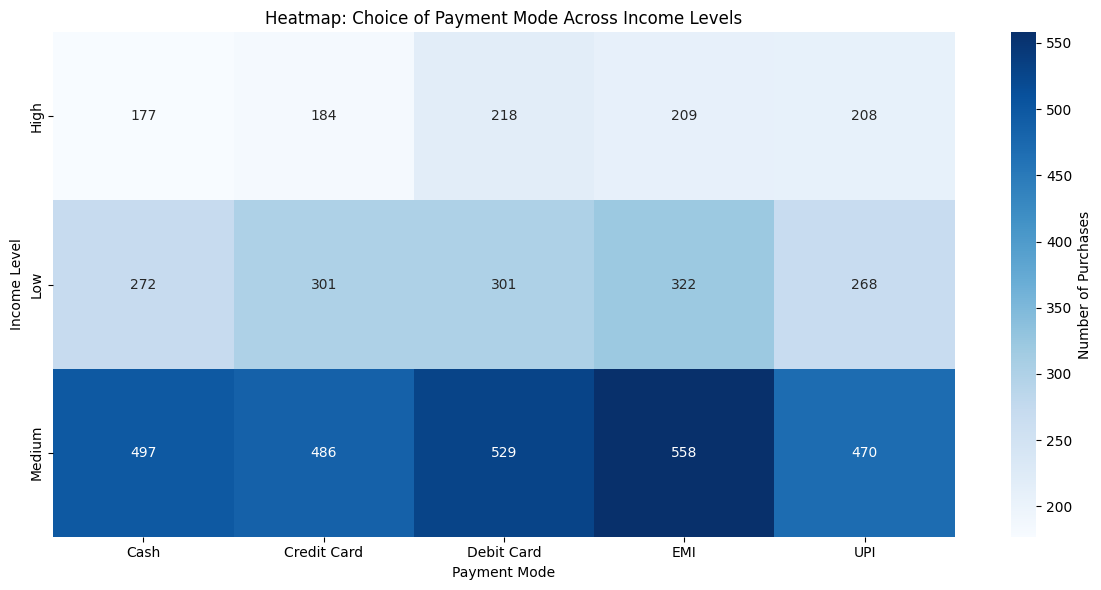

In [38]:
# Pivot the data to create a matrix of counts (Income_Level vs Payment_Mode)
payment_mode_income_pivot = payment_mode_income_counts.pivot(index='Income_Level', columns='Payment_Mode', values='Count').fillna(0)

# Set the plot size
plt.figure(figsize=(12, 6))

# Create a heatmap with a color map
sns.heatmap(payment_mode_income_pivot, annot=True, cmap='Blues', fmt='g', cbar_kws={'label': 'Number of Purchases'})

# Customize the plot
plt.title('Heatmap: Choice of Payment Mode Across Income Levels')
plt.xlabel('Payment Mode')
plt.ylabel('Income Level')
plt.tight_layout()
plt.show()

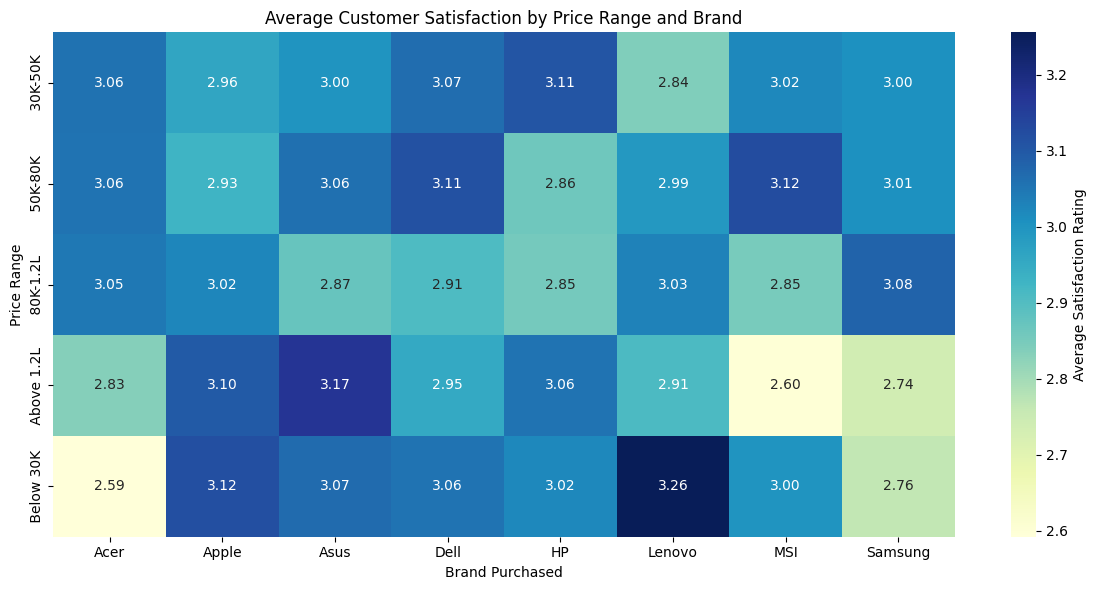

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'Price_Range' and 'Brand_Purchased' and calculate the average satisfaction rating
brand_price_satisfaction = df.groupby(['_Price_Range_', 'Brand_Purchased'])['Satisfaction_Rating'].mean().reset_index()

# Pivot the data to create a matrix for the heatmap (Price_Range vs Brand_Purchased)
satisfaction_pivot = brand_price_satisfaction.pivot(index='_Price_Range_', columns='Brand_Purchased', values='Satisfaction_Rating')

# Set the plot size
plt.figure(figsize=(12, 6))

# Create the heatmap
sns.heatmap(satisfaction_pivot, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Average Satisfaction Rating'})

# Customize the plot
plt.title('Average Customer Satisfaction by Price Range and Brand')
plt.xlabel('Brand Purchased')
plt.ylabel('Price Range')
plt.tight_layout()
plt.show()

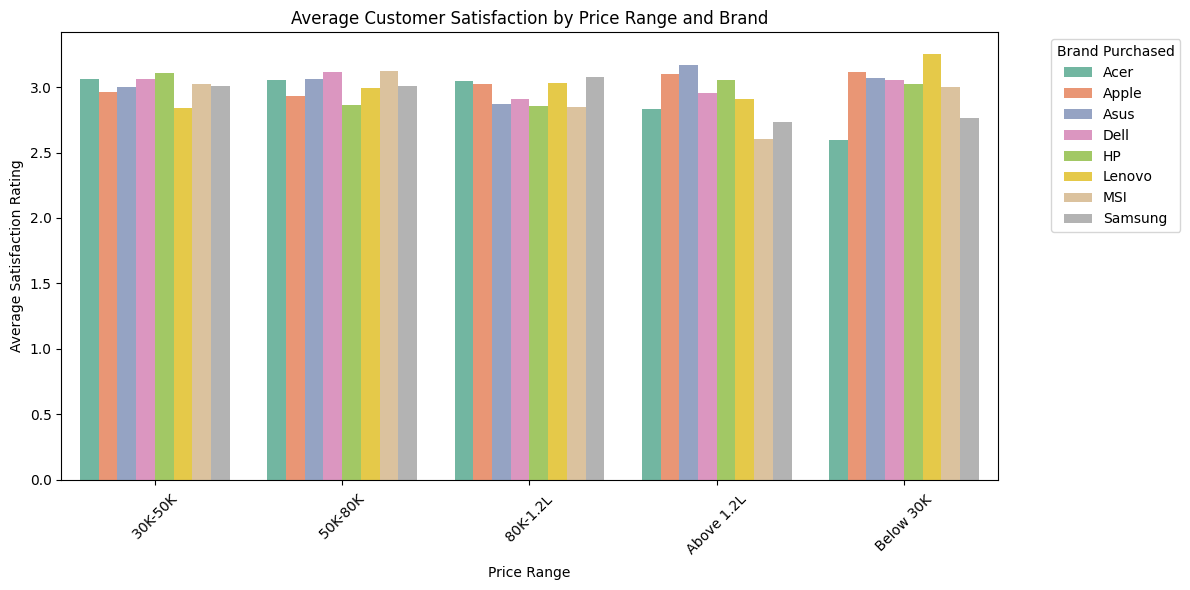

In [40]:
# Create a bar chart for average satisfaction by Price_Range and Brand_Purchased
plt.figure(figsize=(12, 6))

# Create a bar plot with 'Price_Range' and 'Brand_Purchased' on the x-axis and the average satisfaction rating on the y-axis
sns.barplot(data=brand_price_satisfaction, x='_Price_Range_', y='Satisfaction_Rating', hue='Brand_Purchased', palette='Set2')

# Customize the plot
plt.title('Average Customer Satisfaction by Price Range and Brand')
plt.xlabel('Price Range')
plt.ylabel('Average Satisfaction Rating')
plt.xticks(rotation=45)
plt.legend(title='Brand Purchased', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

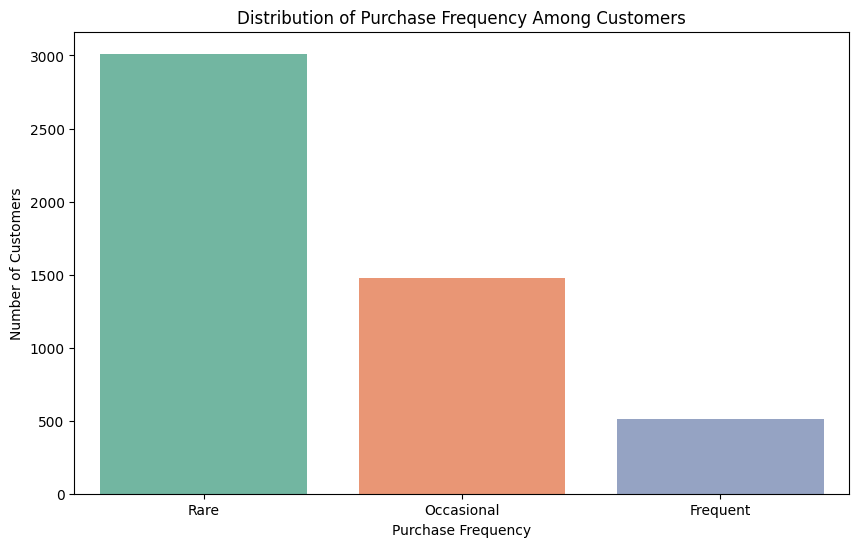

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Purchase_Frequency and count the occurrences
purchase_frequency_counts = df['Purchase_Frequency'].value_counts().reset_index()
purchase_frequency_counts.columns = ['Purchase_Frequency', 'Count']

# Set up the plot size
plt.figure(figsize=(10, 6))

# Create the bar plot with 'Purchase_Frequency' as hue
sns.barplot(x='Purchase_Frequency', y='Count', data=purchase_frequency_counts, hue='Purchase_Frequency', palette='Set2')

# Add title and labels
plt.title('Distribution of Purchase Frequency Among Customers')
plt.xlabel('Purchase Frequency')
plt.ylabel('Number of Customers')

# Display the plot
plt.show()


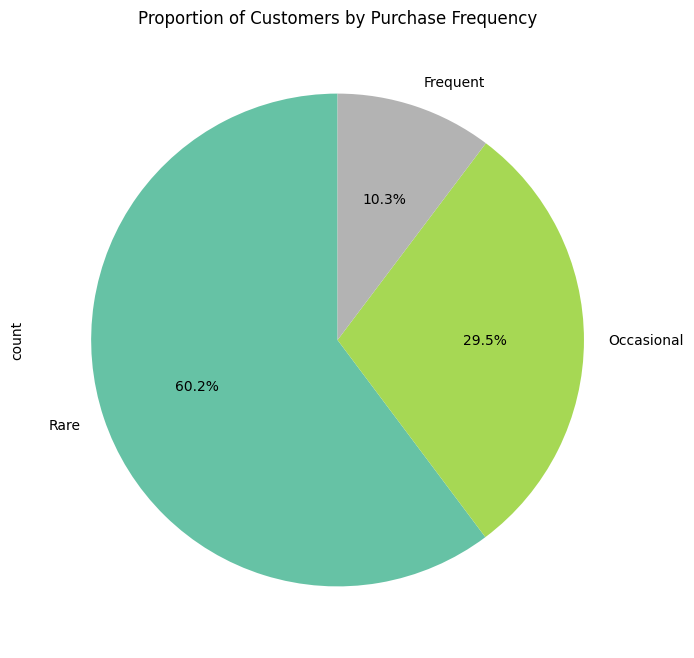

In [42]:
# Plot a pie chart for the distribution of Purchase_Frequency
purchase_frequency_counts = df['Purchase_Frequency'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
purchase_frequency_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set2', legend=False)

# Add title
plt.title('Proportion of Customers by Purchase Frequency')

# Display the pie chart
plt.show()

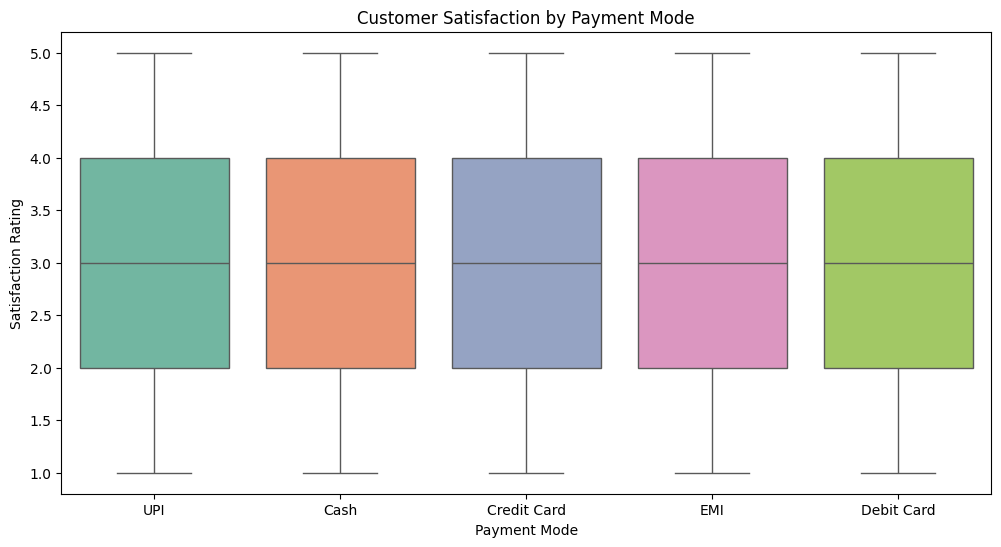

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it contains the columns 'Payment_Mode' and 'Satisfaction_Rating'

# Set up the plot size
plt.figure(figsize=(12, 6))

# Create the box plot with 'Payment_Mode' as hue
sns.boxplot(x='Payment_Mode', y='Satisfaction_Rating', data=df, hue='Payment_Mode', palette='Set2')

# Add title and labels
plt.title('Customer Satisfaction by Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Satisfaction Rating')

# Display the plot
plt.show()

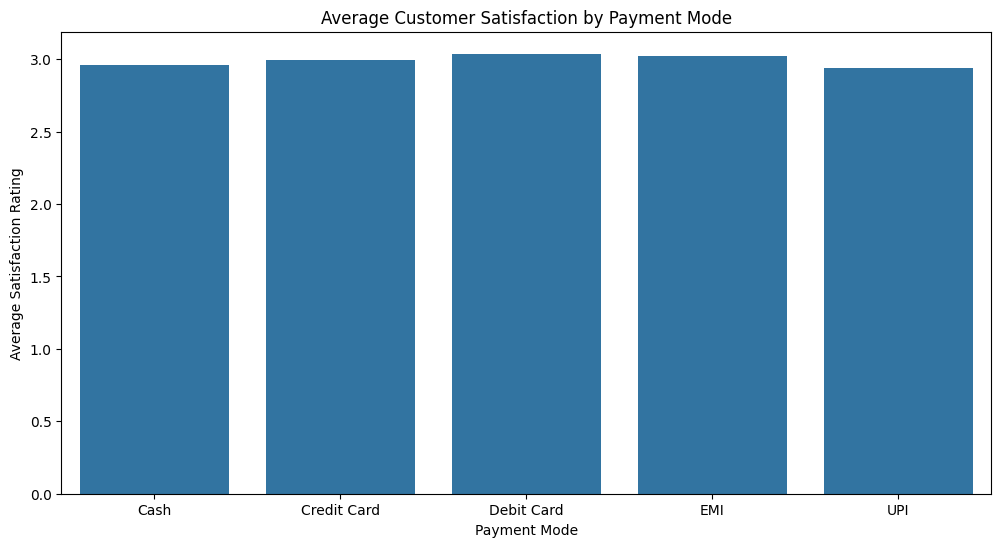

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average satisfaction rating for each payment mode
payment_mode_satisfaction = df.groupby('Payment_Mode')['Satisfaction_Rating'].mean().reset_index()

# Set up the plot size
plt.figure(figsize=(12, 6))

# Create the bar plot without palette
sns.barplot(x='Payment_Mode', y='Satisfaction_Rating', data=payment_mode_satisfaction)

# Add title and labels
plt.title('Average Customer Satisfaction by Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Average Satisfaction Rating')

# Display the plot
plt.show()

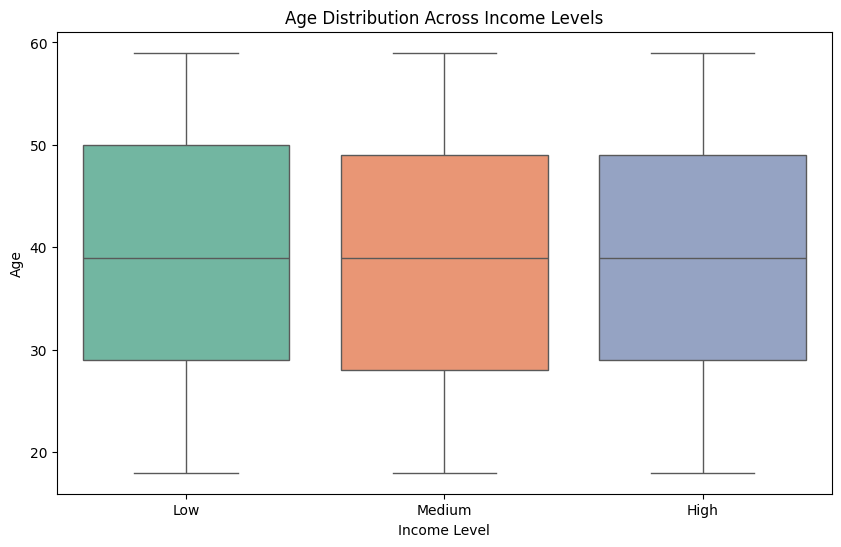

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'Age' and 'Income_Level' columns
# Set up the plot size
plt.figure(figsize=(10, 6))

# Create the box plot with 'Income_Level' as hue
sns.boxplot(x='Income_Level', y='Age', data=df, hue='Income_Level', palette='Set2')

# Add title and labels
plt.title('Age Distribution Across Income Levels')
plt.xlabel('Income Level')
plt.ylabel('Age')

# Display the plot
plt.show()